In [1]:
#분석
import pandas as pd
import numpy as  np
import random as rnd

In [2]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#라이브러리
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LiynearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
# 학습과 검증 데이터 로드
# 이미 나눠져있기 때문에 학습을 위해 분리할 필요 x
# 최종적으로 생존 0 사망 1로 나누는 작업이 필요(이진분류)
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

- Survival 생존여부 0=No 1=Yes
- pclass 사회-경제적지위 1=1st, 2=2nd, 3=3rd
- sex : 성별
- Age : 나이
- sibsp : 타이타닉호에 탑승한 형제-자매 수
- parch ; 타이타닉호에 탑승한 부모-자녀 수
- ticket : 티켓번호
- fare : 탑승 요금
- cabin : 방번호
- embarked : 탑승 지역(항구 위치)
C = Cherbourg,
  Q = Queenstown,
S = Southampton

In [5]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
#기초 통계량 확인.
train_df.describe()
# 자료 샘플 수 = 891, 생존율(평균) : 38.4%

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.350956,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,0.477538,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


#### 데이터 전처리

In [8]:
#결측값 확인.
print(train_df.isnull().sum())
print(train_df.info())
#age와 cabin emberked에서 결측값 확인.
#결측값을 어떻게 처리할지? (삭제, 평균값, 중간값, 최빈값)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Non

In [9]:
#Age는 평균으로 결측값 대체, 
# Cabin은 너무 많고 값을 메길 수 없기 때문에 Null으로 대체
# Age에 중간값도 괜찮을 것으로 보임.
train_df['Age'].fillna(train_df["Age"].mean(), inplace=True)
train_df['Cabin'].fillna('Null', inplace=True)
train_df = train_df.dropna()

print(train_df.isnull().sum())
print(train_df.info())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB
None


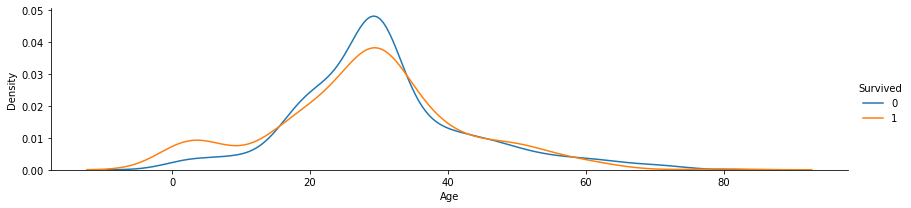

In [10]:
# 결측값 처리 그래프로 확인.
#결측값을 평균값으로 채웠기 때문에 이러한 분포가 나옴.
age_map = sns.FacetGrid(train_df, hue="Survived", aspect=4)
age_map = (age_map.map(sns.kdeplot, "Age").add_legend())

In [11]:
pd.set_option('display.max_columns', None) ## 모든 열 출력
pd.set_option('display.max_rows', None) ## 모든 행 출력

train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Null,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Null,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Null,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Null,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,Null,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,Null,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,Null,C


In [12]:
# 결측값이 제대로 들어갔는지 확인.
print(train_df['Cabin'].value_counts())

Null               687
G6                   4
C23 C25 C27          4
B96 B98              4
F2                   3
C22 C26              3
E101                 3
D                    3
F33                  3
B49                  2
E24                  2
C125                 2
B20                  2
E67                  2
B77                  2
D35                  2
C78                  2
C93                  2
C65                  2
B57 B59 B63 B66      2
B5                   2
E121                 2
B51 B53 B55          2
B18                  2
C124                 2
C126                 2
B35                  2
E44                  2
C92                  2
C68                  2
D20                  2
B22                  2
E25                  2
D36                  2
E8                   2
C83                  2
F G73                2
D17                  2
D26                  2
C2                   2
D33                  2
E33                  2
C52                  2
F4         

In [13]:
#남여 비율 확인
print(train_df["Sex"].value_counts())

male      577
female    312
Name: Sex, dtype: int64


In [14]:
#생존여부
print(train_df["Survived"].value_counts())

0    549
1    340
Name: Survived, dtype: int64


In [51]:
#남자 0 여자 1 로 분류
train_test_data = [train_df, test_df]

sex_mapping = {"male":0, "female":1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

C:\Users\82106\AppData\Local\Temp/ipykernel_1600/1554423670.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Sex'] = dataset['Sex'].map(sex_mapping)


In [53]:
train_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,3,NaN,22.0,1,0,A/5 21171,7.2500,Null,S,Student
1,2,1,NaN,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,3,NaN,26.0,0,0,STON/O2. 3101282,7.9250,Null,S,Young Adult
3,4,1,NaN,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,3,NaN,35.0,0,0,373450,8.0500,Null,S,Young Adult


#### 시각화

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

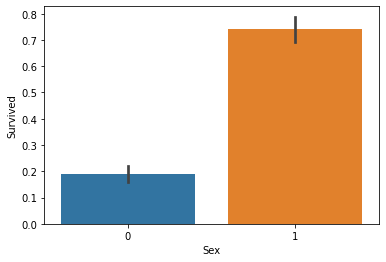

In [17]:
#성별로 남 여 데이터 확인.
sns.barplot(x="Sex", y="Survived", data=train_df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

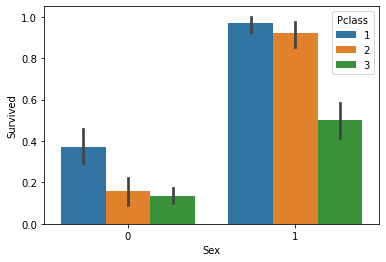

In [18]:
# 성별과 선실에 따른 생존여부 확인.
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=train_df)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

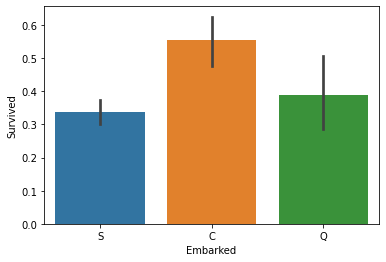

In [19]:
# 선착지에에 따른 생존여부 확인.
sns.barplot(x='Embarked', y='Survived', data=train_df)
#Southampton이 생존율이 제일 낮은 것을 확인.

In [20]:
# 나이대별 그룹화를 하려면 결측값(평균으로 처리)한 값들을
# 바꿔야 하지 않을까?

In [21]:
# Young Adult가 제일 많이 나타날 수 밖에 없음.
# 결측값 처리 때문에
def get_category(age):
    people = ""
    if age <= 0: people = "Baby"
    elif age <= 12: people = "Child"
    elif age <= 20: people = "Teenager"
    elif age <= 25: people = "Student"
    elif age <= 35: people = "Young Adult" 
    elif age <= 60: people = "Adult"
    else : people = "Elderly"
    return people

train_df["AgeGroup"] = train_df["Age"].apply(lambda x : get_category(x))
train_df["AgeGroup"].value_counts()

C:\Users\82106\AppData\Local\Temp/ipykernel_1600/2960545155.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["AgeGroup"] = train_df["Age"].apply(lambda x : get_category(x))


Young Adult    373
Adult          194
Student        122
Teenager       110
Child           69
Elderly         21
Name: AgeGroup, dtype: int64

<AxesSubplot:xlabel='AgeGroup', ylabel='Survived'>

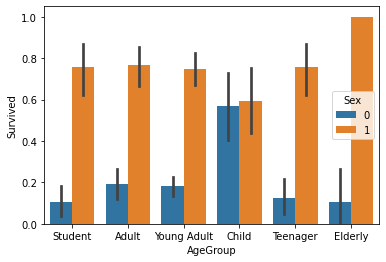

In [22]:
#y 인자값을 설정.
sns.barplot(x="AgeGroup", y="Survived", hue="Sex", data=train_df)

<AxesSubplot:xlabel='AgeGroup', ylabel='Survived'>

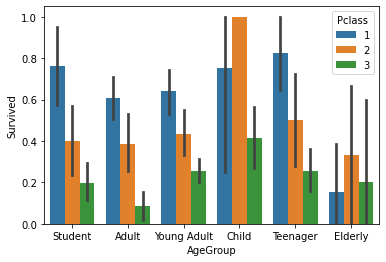

In [23]:
#선실 등급과 나이 그룹 시각화: 1등실일수록 생존률이 높다.
sns.barplot(x='AgeGroup', y='Survived', hue='Pclass', data=train_df)

In [24]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,Null,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,Null,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,Null,S,Young Adult
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,Null,Q,Young Adult
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,E46,S,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,Null,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,Null,S,Young Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,Null,C,Teenager


In [47]:
# 훈련에 이용하지 않을 column 삭제
drop_column = ['Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin']

for dataset in train_df:
    dataset = dataset.drop(drop_column, axis=1, inplace=True)

AttributeError: 'str' object has no attribute 'drop'